Predict Clothing size using age, height and weight

In [19]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
import matplotlib.pyplot as plt

In [20]:
data_import = pd.read_csv("/content/clothing_size.csv")
data_import

,weight,age,height,size
0,62,28.0,172.72,XL
1,59,36.0,167.64,L
2,61,34.0,165.10,M
3,65,27.0,175.26,L
4,62,45.0,172.72,M
...,...,...,...,...
119729,63,42.0,175.26,M
119730,45,29.0,154.94,S
119731,61,31.0,172.72,M
119732,74,31.0,167.64,XL


exploratory Data analysis


In [21]:
data_import["size"].value_counts()

M       29712
S       21924
XXXL    21359
XL      19119
L       17587
XXS      9964
XXL        69
Name: size, dtype: int64

Data Preparation

Dealing with blank data

In [22]:
data_step_one = data_import.copy()

data_step_one = data_step_one.dropna(axis=0)

dropped_rows = len(data_import) - len(data_step_one)

print("Rows Dropped: ", dropped_rows)

Rows Dropped:  581


Dropping the category XXL as 69 record out of 100 thousand is not significant

In [23]:
data_step_one = data_step_one[data_step_one["size"] != "XXL"]
data_step_one

,weight,age,height,size
0,62,28.0,172.72,XL
1,59,36.0,167.64,L
2,61,34.0,165.10,M
3,65,27.0,175.26,L
4,62,45.0,172.72,M
...,...,...,...,...
119729,63,42.0,175.26,M
119730,45,29.0,154.94,S
119731,61,31.0,172.72,M
119732,74,31.0,167.64,XL


Train Test Split

In [24]:
X = data_step_one[["weight", "age", "height"]]
y = data_step_one["size"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

Modeling

In [ ]:
Decision Tree Single Run function

In [25]:
def decision_tree_run(depth):
    tree_clf = DecisionTreeClassifier(max_depth=depth)
    tree_clf.fit(X_train, y_train)
    return tree_clf.score(X_test, y_test)
decision_tree_run(None)

0.5029009109878365

Decision tree - multiple runs with variable tree depth

In [26]:
accuracy = []
tree_depth = list(range(2, 100, 3))

In [27]:
for i in tree_depth:
    accuracy.append(decision_tree_run(i))
accuracy

[0.4439666140770523,
 0.5046058323578808,
 0.5116545371265713,
 0.5151661662171103,
 0.5098478294060766,
 0.5056745890376101,
 0.5033589495648634,
 0.5031299302763499,
 0.503002697338287,
 0.5032317166268003,
 0.5030535905135122,
 0.5029518041630617,
 0.5029263575754491,
 0.5030535905135122,
 0.5030535905135122,
 0.5030281439258996,
 0.5030535905135122,
 0.5028754644002239,
 0.5030790371011248,
 0.5028754644002239,
 0.5029009109878365,
 0.5029518041630617,
 0.5029263575754491,
 0.5029263575754491,
 0.5029518041630617,
 0.5028754644002239,
 0.5029263575754491,
 0.5031044836887374,
 0.503002697338287,
 0.5030790371011248,
 0.5029772507506743,
 0.5029263575754491,
 0.5029263575754491]

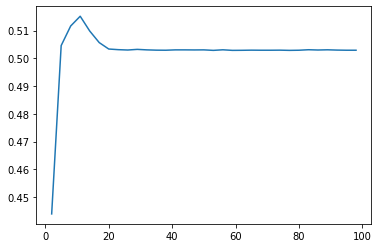

In [28]:
plt.plot(tree_depth, accuracy)

Evaluations

Decision Tree Graph

In [31]:
tree_clf = DecisionTreeClassifier(max_depth=5)
tree_clf.fit(X_train, y_train)

export_graphviz(
    tree_clf,
    out_file="iris_tree.dot",
    feature_names = X_train.columns,
    rounded=True,
    filled=True
)

In [32]:
results = pd.DataFrame(data = {"Predictions":tree_clf.predict(X_test).tolist(), "Actuals": y_test.to_list()})
results["Matching"] = results.apply(lambda x: "Correct" if x["Predictions"] == x["Actuals"] else "Wrong", axis=1)
results

,Predictions,Actuals,Matching
0,L,XL,Wrong
1,XXS,M,Wrong
2,XL,XXXL,Wrong
3,XXXL,XXXL,Correct
4,S,S,Correct
...,...,...,...
39293,XXXL,XXXL,Correct
39294,XL,M,Wrong
39295,XL,XL,Correct
39296,M,S,Wrong


In [33]:
correct_wrong_data = results.groupby(["Actuals", "Matching"])["Predictions"].count().reset_index()
correct_wrong_data["Labels"] = correct_wrong_data["Actuals"] + " - " + correct_wrong_data["Matching"]
correct_wrong_data["Colors"] = correct_wrong_data["Matching"].map(lambda x: "b" if x == "Correct" else "r")
correct_wrong_data

,Actuals,Matching,Predictions,Labels,Colors
0,L,Correct,1397,L - Correct,b
1,L,Wrong,4299,L - Wrong,r
2,M,Correct,6023,M - Correct,b
3,M,Wrong,3820,M - Wrong,r
4,S,Correct,3133,S - Correct,b
5,S,Wrong,4086,S - Wrong,r
6,XL,Correct,2818,XL - Correct,b
7,XL,Wrong,3488,XL - Wrong,r
8,XXS,Correct,1521,XXS - Correct,b
9,XXS,Wrong,1755,XXS - Wrong,r


<BarContainer object of 12 artists>

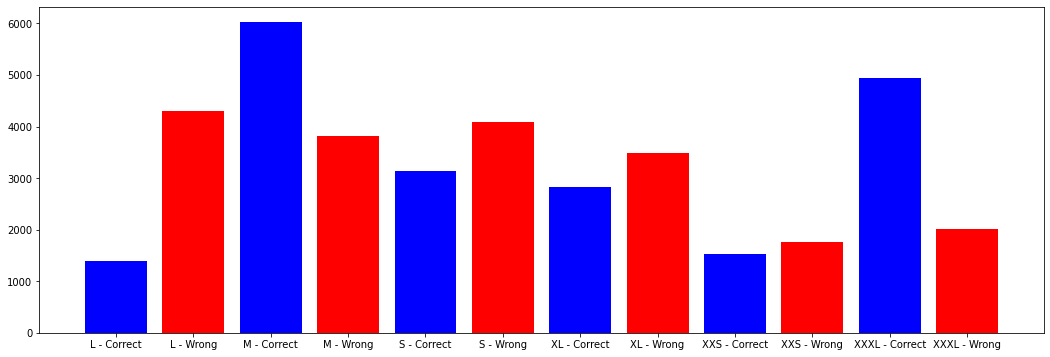

In [34]:
plt.figure(figsize=(18, 6))
fig = plt.bar(x=correct_wrong_data["Labels"], height=correct_wrong_data["Predictions"], color=correct_wrong_data["Colors"])
fig

In [37]:
confusion_matrix(y_test, tree_clf.predict(X_test).tolist())

array([[1397, 2277,  189, 1579,   16,  238],
       [1195, 6023, 1657,  712,  193,   63],
       [ 158, 2788, 3133,   69, 1056,   15],
       [1123, 1197,   81, 2818,   12, 1075],
       [  10,  335, 1397,    7, 1521,    6],
       [ 283,  183,   22, 1522,   10, 4938]])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


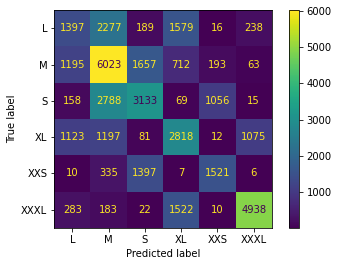

In [38]:
plot_confusion_matrix(tree_clf, X_test, y_test)